# Reinforcement Learning: Q-learning

This example is based on FrozenLake Game from Gym environement. <br>
More information here: <br>
https://gym.openai.com/envs/FrozenLake-v0/

In [33]:
import numpy as np
import gym
import random
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output
from matplotlib import pyplot as plt

Load game environment

In [2]:
env = gym.make("FrozenLake-v0")

action_size = env.action_space.n # Number of Actions : 4
state_size = env.observation_space.n # Number of States: 16

Q-Table initialization (16x4)

In [3]:
Q = np.zeros((state_size, action_size))
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Hyperparameters

In [48]:
# Allow user to customize Hyperparameters
f1 = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.8)
f2 = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.95)
f3 = widgets.FloatSlider(min=0,max=1,step=0.01,value=1)

i1 = widgets.IntSlider(min=0,max=50000,step=1,value=15000)

submit = widgets.Button(description="Assign")

# Create interraction
print("Learning rate:")
display(f1)
print("Gamma:")
display(f2)
print("Epsilon, Eploration vs Exploitation ratio")
display(f3)
print("Total Number of Episode:")
display(i1)

display(submit)

# Assign variable
def on_button_click(b):
    global totalEpisode, learningRate, gamma, epsilon
    totalEpisode = i1.value
    learningRate = f1.value
    gamma = f2.value
    epsilon = f3.value
    print("Values modified!")

submit.on_click(on_button_click)

Learning rate:


FloatSlider(value=0.8, max=1.0, step=0.01)

Gamma:


FloatSlider(value=0.95, max=1.0, step=0.01)

Epsilon, Eploration vs Exploitation ratio


FloatSlider(value=1.0, max=1.0, step=0.01)

Total Number of Episode:


IntSlider(value=15000, max=50000)

Button(description='Assign', style=ButtonStyle())

Values modified!
Values modified!
Values modified!
Values modified!


Q-Learning algorithm <br>

for Total number of episode: 
    1. Choose between
        1.1 exploration: Do a random action
        1.2 exploitation: take an action of the current state (s) based on Q-table value
    2. Observe the outcome (s') and reward (r)
    3. Update Q-table


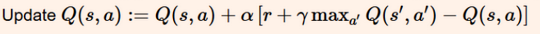

In [80]:
# List of rewards
rewards = []
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.0001            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

# 2 For life or until learning is stopped
for episode in range(totalEpisode):
    # Reset the environment
    state = env.reset()
    done = False
    total_rewards = 0
    notDone = True
    
    while notDone:

        if (random.uniform(0,1)) > epsilon:
            # Exploitation
            action = np.argmax(Q[state,:])
        else:
            # Exploration
            action = env.action_space.sample()
            
        # Get reward and observetion from performed action
        new_state, reward, done, info = env.step(action)
        
        oldQ = Q[state, action]
        nextStateMax = np.max(Q[new_state, :])
        
        # Update Q
        Q[state, action] = (1 - learningRate) * oldQ + learningRate * (reward + gamma * nextStateMax)
                              
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            notDone = False
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    
    rewards.append(total_rewards)
    if i % 100 == 0:
        clear_output(wait=True)
        print("Episode: ",i)
        
print ("Score over time: " +  str(sum(rewards)/totalEpisode))
print(Q)

Score over time: 0.69832
[[1.53197420e-01 3.18117538e-02 3.67722224e-02 3.64061268e-02]
 [7.12871362e-04 4.08835107e-05 3.48156174e-03 1.73558806e-01]
 [5.85026283e-04 3.89087379e-03 3.54587243e-04 1.73630977e-01]
 [9.97713815e-05 1.77802137e-03 2.74547523e-03 8.66588097e-02]
 [1.11137753e-01 3.15665953e-02 1.10577707e-02 4.14772472e-04]
 [2.98743693e-09 5.93875604e-09 3.11604904e-09 3.33262634e-09]
 [7.88325097e-02 3.61046336e-07 1.89291630e-07 5.85781441e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.68838154e-03 1.00291285e-02 9.79469941e-04 5.52658741e-02]
 [4.46580567e-04 1.67610824e-01 3.40547103e-04 5.31040443e-03]
 [2.81317939e-03 5.49220777e-04 1.08007699e-05 1.26323802e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.40291776e-02 1.75754942e-02 2.97551656e-01 6.16915273e-04]
 [8.47288489e-02 8.61852165e-01 8.08606327e-02 6.78632714e-02]
 [0.00000000e+00 0.00000000e+0

Text(0.5, 1.0, 'Rewards overs iterations')

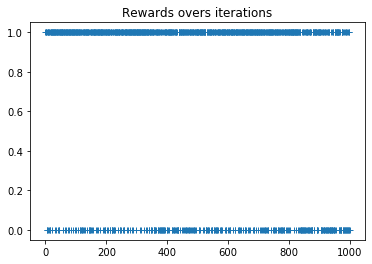

In [81]:
plt.plot(rewards[14000:15000],'+')
plt.title("Rewards overs iterations")

We se that the more iteration we go though the more the agent is wining the game (reward=1)

# Benchmark of our agent

In [88]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 32
****************************************************
EPISODE  1
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 52
****************************************************
EPISODE  2
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 56
****************************************************
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 8
****************************************************
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 12


In [67]:
%%bash
# TO HTML
jupyter nbconvert --to html q-learning.ipynb

[NbConvertApp] Converting notebook q-learning.ipynb to html
[NbConvertApp] Writing 328831 bytes to q-learning.html
